<a href="https://colab.research.google.com/github/IsabellaSampaio/digit-recognizer/blob/main/digitrecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problema:** Digit Recognizer do kaggle -> https://www.kaggle.com/competitions/digit-recognizer/overview

**Objetivo:** A partir de uma imagem dada, reconhecer o dígito presente nela

**Métrica:** Acurácia da categorização das predições do algoritmo. Quanto mais imagens ele acertar, melhor será considerado o algoritmo.



Imports necessários das bibliotecas de ML como keras, numpy, pandas etc

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical


Código principal

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train_labels = train['label']
train_images = train.drop('label', axis=1)

#normalizando os valores do pixel para 0 / 1
train_images = train_images / 255.0
test_images = test / 255.0

#redimensionando as imagens para 28x28
train_images = train_images.values.reshape(-1, 28, 28, 1)
test_images = test_images.values.reshape(-1, 28, 28, 1)

#convertendo para o foromato de um vetor binário (one-hot)
train_labels = to_categorical(train_labels)

In [ ]:
#separando o conjunto de dados em conjunto de treino e validação para depois avaliar o algoritmo e a rede treinada
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)

In [ ]:
#usando rede neural convolucional e analisando as caracaterísticas espaciais das iamgens de dígitos
#categorical_crossentropy é uma classe que calcula perdas probabilísticas - Keras
rn_modelo = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

rn_modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#efetivamente treinando o modelo
hist = rn_modelo.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=200)

Epoch 1/10
189/189 [==============================] - 30s 156ms/step - loss: 0.5362 - accuracy: 0.8291 - val_loss: 0.1340 - val_accuracy: 0.9624
Epoch 2/10
189/189 [==============================] - 30s 157ms/step - loss: 0.1644 - accuracy: 0.9512 - val_loss: 0.0856 - val_accuracy: 0.9755
Epoch 3/10
189/189 [==============================] - 30s 161ms/step - loss: 0.1197 - accuracy: 0.9633 - val_loss: 0.0644 - val_accuracy: 0.9800
Epoch 4/10
189/189 [==============================] - 30s 157ms/step - loss: 0.0999 - accuracy: 0.9699 - val_loss: 0.0560 - val_accuracy: 0.9836
Epoch 5/10
189/189 [==============================] - 30s 157ms/step - loss: 0.0876 - accuracy: 0.9736 - val_loss: 0.0498 - val_accuracy: 0.9855
Epoch 6/10
189/189 [==============================] - 30s 157ms/step - loss: 0.0769 - accuracy: 0.9762 - val_loss: 0.0446 - val_accuracy: 0.9862
Epoch 7/10
189/189 [==============================] - 29s 155ms/step - loss: 0.0688 - accuracy: 0.9788 - val_loss: 0.0454 - val_ac

In [ ]:
#avaliando a precisão do modelo e vendo se é performático ou ñ
val_perdas, val_acc = rn_modelo.evaluate(X_val, y_val)
print(f'Validation Accuracy: {val_perdas}')

132/132 [==============================] - 1s 8ms/step - loss: 0.0377 - accuracy: 0.9874
Validation Accuracy: 0.037662357091903687


In [ ]:
#usando o modelo pra fazer as previsões nos dados do test.csv
preds = rn_modelo.predict(test_images)
preds_labels = np.argmax(preds, axis=1)

875/875 [==============================] - 7s 8ms/step


Submissão com o resultado final depois de treinar a rede

In [ ]:
#fazendo o submissão com o resultado final
submissao = pd.DataFrame({
    'ImageId': np.arange(1, len(preds_labels) + 1),
    'Label': preds_labels
})

submissao.to_csv('submission.csv', index=False)

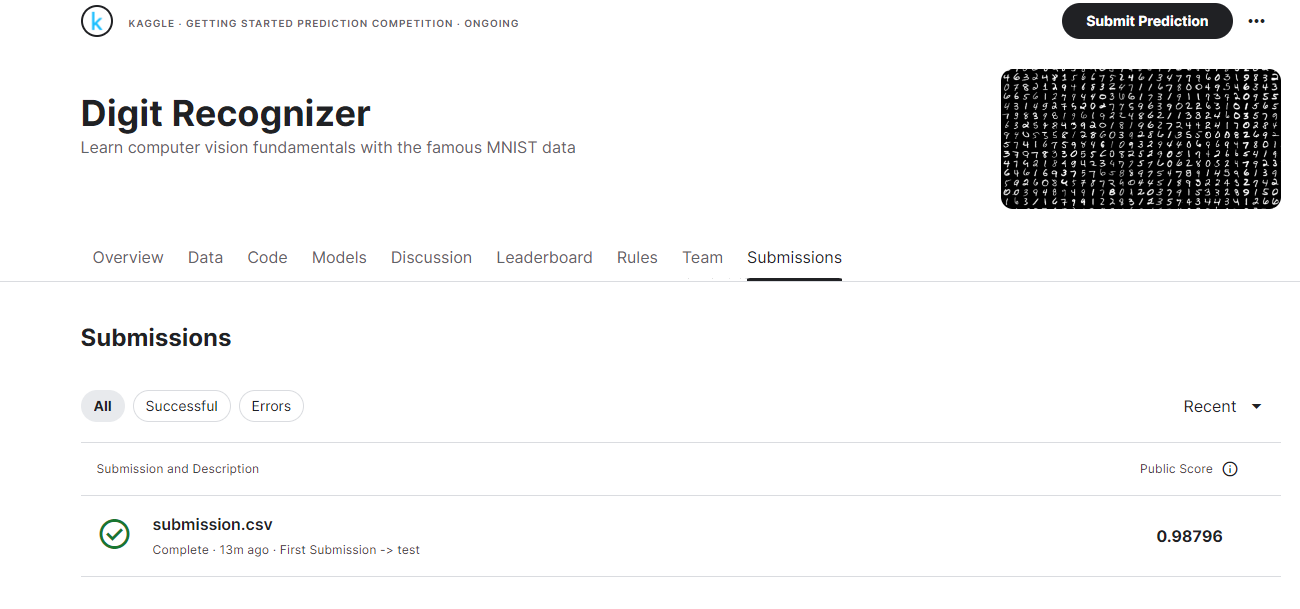